<a href="https://colab.research.google.com/github/ehughe33/DTSC-2302-Project-Group-1/blob/main/DTSC1302Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC 1302 Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "https://raw.githubusercontent.com/ehughe33/DTSC-2302-Project-Group-1/main/adult.data"
df = pd.read_csv(url, header=None,names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'])  # Use header=None if the file has no header row
print(f"# of rows in data: {df.shape[0]}, # columns in data: {df.shape[1]}")
df.head(2)

In [ ]:
#df = pd.read_csv("adult.data", header=0, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'])
#print(f"# of rows in data: {df.shape[0]}, # columns in data: {df.shape[1]}")
#df.head(2)

# of rows in data: 32560, # columns in data: 15


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  class           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# finding unique values for each columnn to identify problematic values

for column in df.columns:
  print(f"\nUnique values in column {column}: \n{df[column].unique()}")


Unique values in column age: 
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values in column workclass: 
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in column fnlwgt: 
[ 83311 215646 234721 ...  34066  84661 257302]

Unique values in column education: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in column education-num: 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in column marital-status: 
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in 

# Data Cleansing

### Dealing With Null Values

In [ ]:
# Strip whitespace from the entire DataFrame to handle spaces around "?"
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)
# Printing missing values by column
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


In [ ]:
# Check how many people that have "na" for workclass have income more than 50k
null_workclass_high_income = df[(df['workclass'].isnull()) & (df['class'] == '>50K')]
# Count the number of such entries
num_entries = null_workclass_high_income.shape[0]

print(f"Number of entries where 'workclass' is null and 'class' is '>=50k': {num_entries}")

Number of entries where 'workclass' is null and 'class' is '>=50k': 191


Only 191 people have income greater than $50k

In [ ]:
# Count the number of entries where both 'workclass' and 'occupation' are NaN
num_na_entries = df[df['workclass'].isna() & df['occupation'].isna()].shape[0]

print(f"Number of entries with NaN in both 'workclass' and 'occupation': {num_na_entries}")


Number of entries with NaN in both 'workclass' and 'occupation': 1836


In [ ]:
# Visualizing missing entries
missing_workclass_occupation = df[df['workclass'].isna() & df['occupation'].isna()]
#na_entries.sort_values(by = "hours-per-week", ascending=True)

# Checking median weekly working hours for people with missing 'workclass' and 'occupation'
median_hours = missing_workclass_occupation['hours-per-week'].median()

print(f"Median weekly working hours for people with missing 'workclass' and 'occupation': {median_hours}")

Median weekly working hours for people with missing 'workclass' and 'occupation': 36.0


Based on this we can not say that people with missing 'workclass' and 'occupation' entries are unemployed

#### There are however, 7 missing entries for 'occupation' which do seem to be characteristics of the data, as all of the people with missing values for their occupation have 'Never-worked' as their 'workclass', which sounds reasonable.

In [ ]:
df[(df["workclass"].notnull()) & (df["occupation"].isna())]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
5360,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10844,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14771,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20336,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23231,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32313,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [ ]:
df.loc[df['workclass']=="Never-worked", 'occupation'] = 'Never-worked' # replace null with Never-worked where occupation is also 'Never-worked'

#### After trying to group the amount of null values in 'native-country' into different categories, it does not appear that native-country being null is a feature of the data and is quite random and follows the distribution of the data.

In [ ]:
null_country_df = df[df["native-country"].isna()].groupby("sex").count() # replace 'sex' with different column names to try
null_country_df.rename(columns={"class":"# Null Entries for native-country"}, inplace=True)
null_country_df["# Null Entries for native-country"]

,# Null Entries for native-country
sex,
Female,163
Male,420


#### As found earlier, these are the unique values within the **'native-country'** column

['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']

There are **two problems** with this to be noted,

1. **"South"** is not a valid country name, however we found that %96.25 of people with 'native-country'=='South' are of the race Asian-Pac-Islander. Thus it is reasonable to say that 'South' refers to 'South Korea' as no other Asian country starts with 'South'
2. **'Hong'** is listed as a native country when the correct name is 'Hong Kong'



In [ ]:
df[df["native-country"]=="South"]["race"].value_counts()

,count
race,
Asian-Pac-Islander,77
Amer-Indian-Eskimo,2
White,1


In [ ]:
df.replace("Hong", "Hong-Kong", inplace=True) # replacing 'Hong' with 'Hong-Kong' for accuracy
df.replace("South", "South-Korea", inplace=True) # replacing South with South-Korea using knowledge that 96% of people from "South" are Asian

## Data Viz

In [ ]:
df.replace("<=50K", 0, inplace=True)
df.replace(">50K", 1, inplace=True)
df.head(1)

<ipython-input-40-57151222788c>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


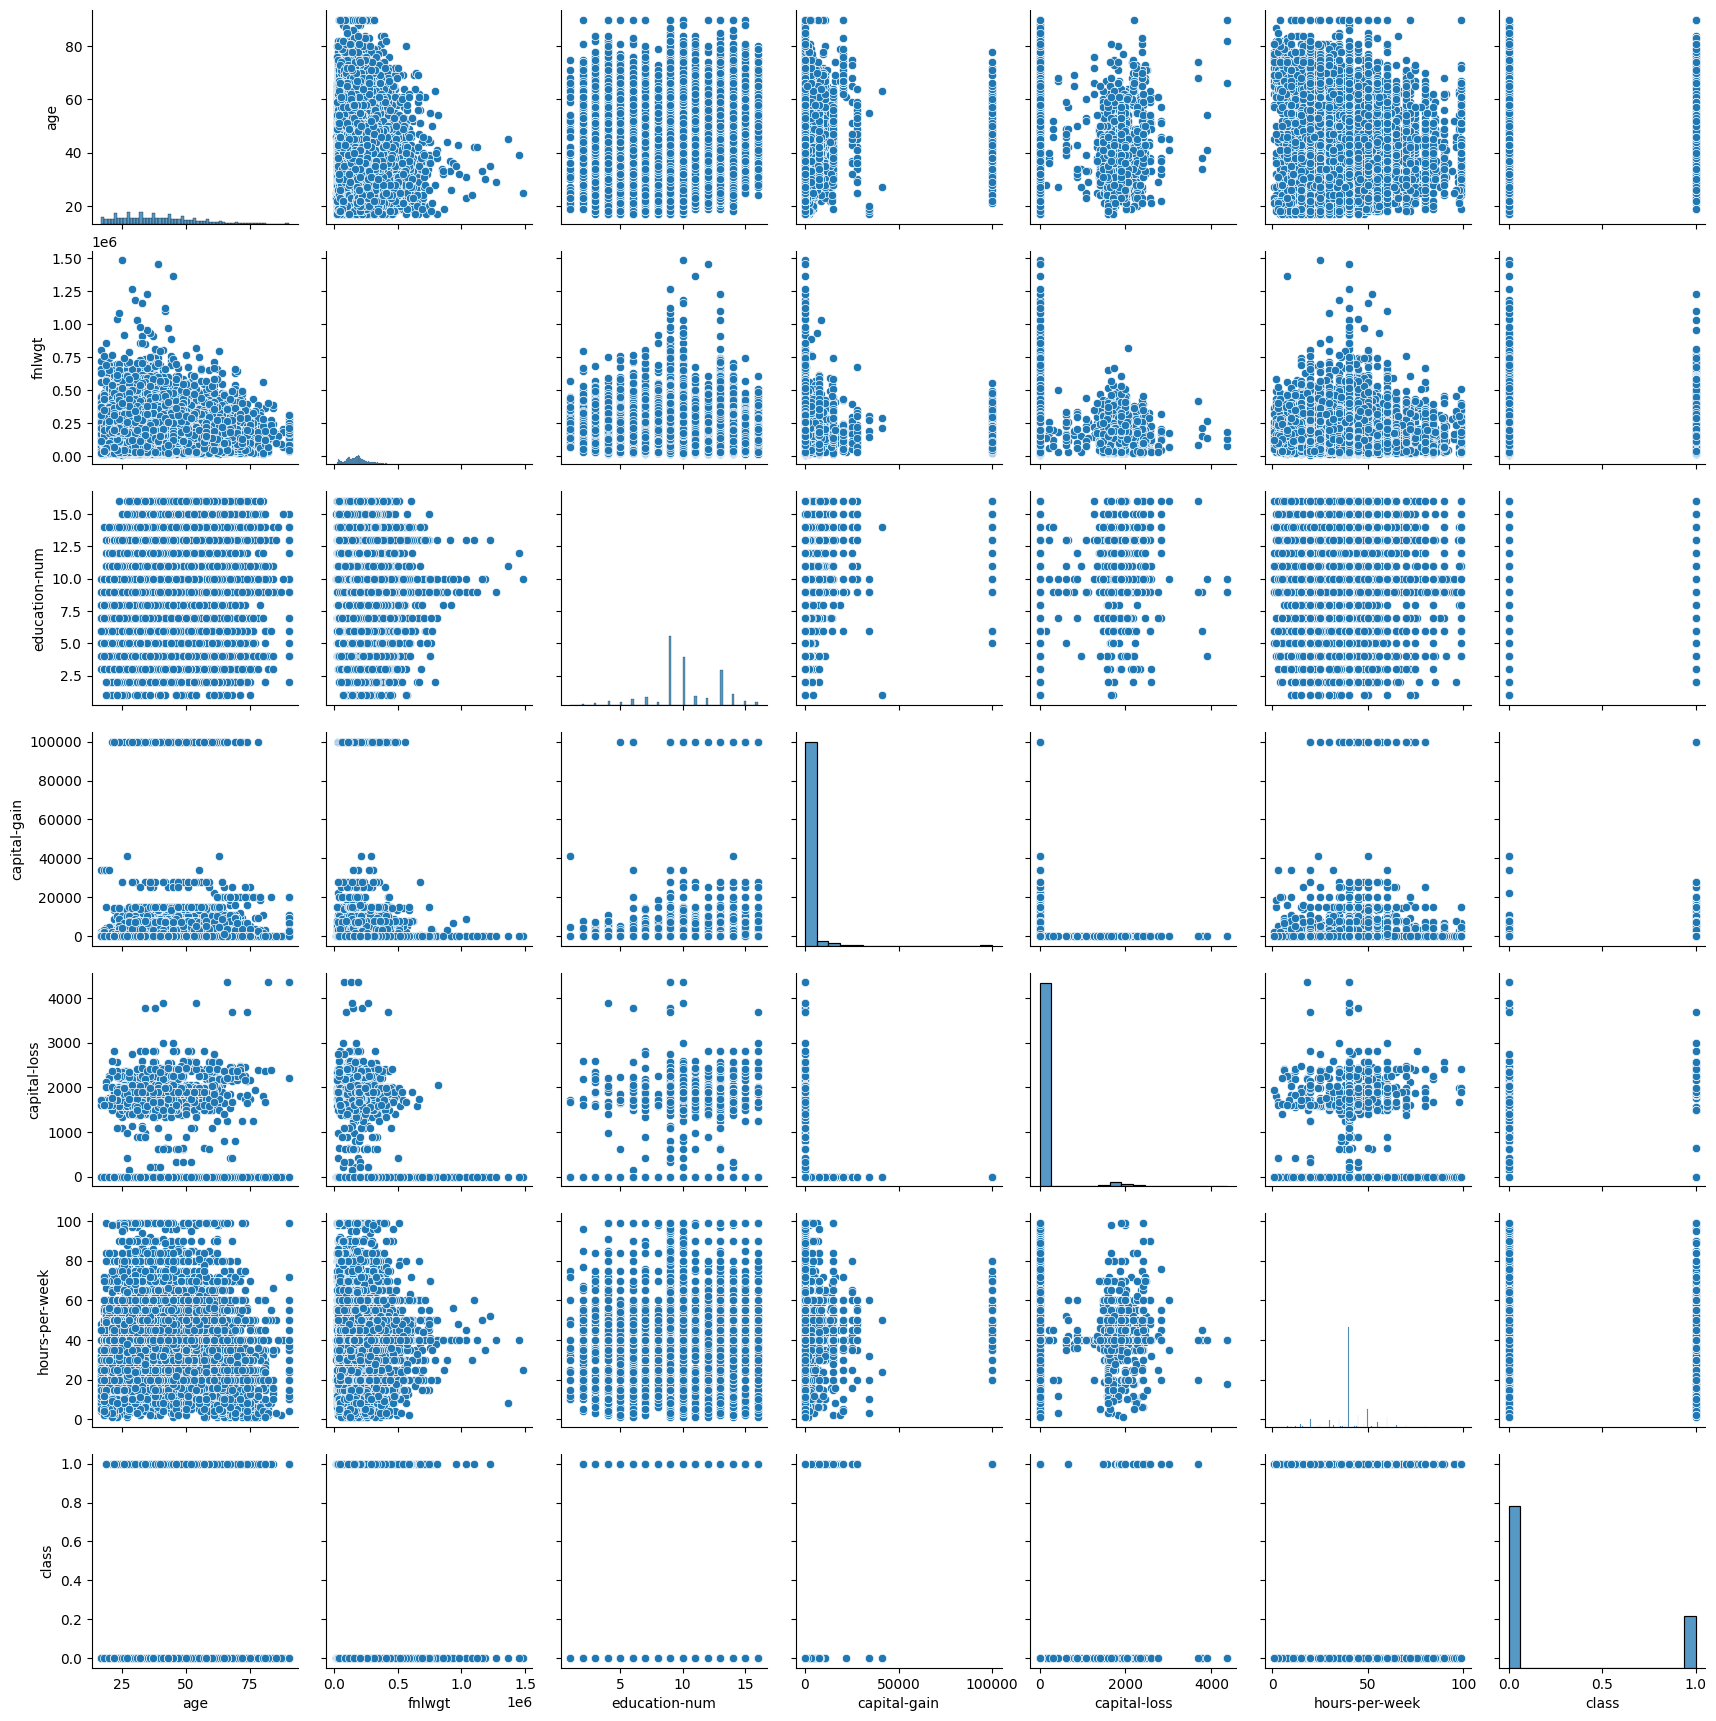

In [ ]:
sns.pairplot(df)

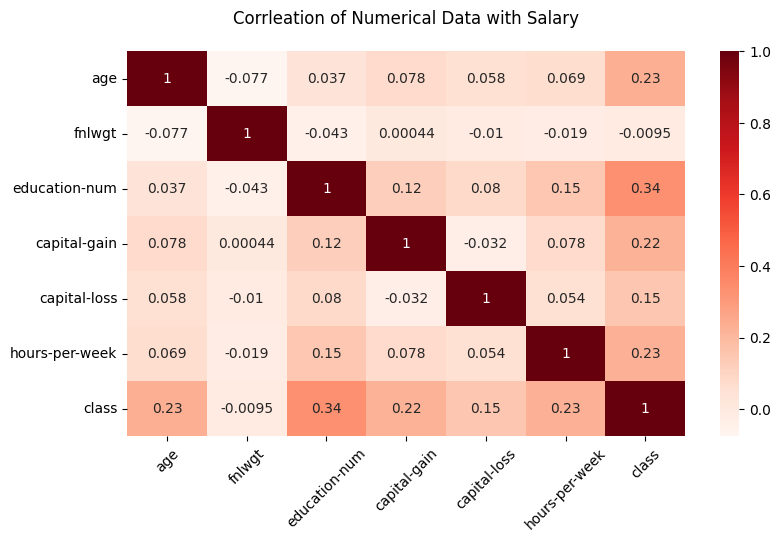

In [ ]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(numeric_only=True), cmap="Reds", annot=True)
plt.title("Corrleation of Numerical Data with Salary", pad=20)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Dropping all NA's
df = df.dropna()

In [ ]:
import plotly.express as px
def plot_percent_over_50k(category: str) -> None:
  """
  This function takes in a string that represnts a categorical column within the dataset and produces a plotly bar graph
  of the percent of people within that category that make more than 50k.
  """
  total_df = df.groupby(by=[category])  # entire df grouped by category
  approved_df = df[df["class"]==1].groupby(by=[category])  # df of people making over 50k grouped by same category
  percent_df = approved_df.size()/total_df.size()
  fig = px.bar(percent_df)
  fig.update_layout(title={
                      "text": f"Percent of People Making $>50k by {category.title()} Category",
                      "x": 0.5,
                      "xanchor": "center"
                    },
                    yaxis_title="% Making More than 50k",
                    showlegend=False,
                    template="plotly_dark")
  fig.show()

plot_percent_over_50k("relationship")

Logistical Model Generation

In [ ]:
# Creating Logistical Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)
# Convert any boolean columns to integers (0 and 1)
df = df.astype(int)
df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,class,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South-Korea,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(accuracy)

0.80195558501823


In [ ]:
#df.to_csv('df_with_dummies.csv', index=False)